# Data Cleaning and EDA

Reddit is a collection of online discussion boards known as "subreddits", which cover a variety of topics including links, text posts, and images, which are then voted up or down by other members. The goal of this project is to classify which subreddit a given post came from. As there are over 1.5 million subreddits on reddit, we will be classifying posts from two subreddits, [/r/AppleWatch](https://www.reddit.com/r/AppleWatch/) and [/r/GalaxyWatch](https://www.reddit.com/r/GalaxyWatch/).  We will be creating and comparing three models: a logistic regression, multinomial naive Bayes classifier and Random Forest Classifier. 

The dataset required for our analysis have already been webscraped in previous notebooks. In this notebook, we will do some basic data cleaning and EDA.


In [280]:
#imports
import requests
import pandas as pd
import time
import random
import numpy as np
from PIL import Image 
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.tokenize import RegexpTokenizer 
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.stem.snowball import EnglishStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup    
import regex as re

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix

In [205]:
#Read the csv's
apple = pd.read_csv('apple1.csv')
galaxy = pd.read_csv('galaxy1.csv')

In [206]:
#Check the rows and columns
pd.set_option('display.max_columns', 200)
display(apple.head())
display(galaxy.head(30))

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,post_hint,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,url_overridden_by_dest,view_count,archived,no_follow,is_crosspostable,pinned,over_18,preview,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,media_metadata,crosspost_parent_list,crosspost_parent,author_cakeday,poll_data
0,NaN,AppleWatch,NaN,t2_6pgj3l99,False,NaN,0,False,Annoying isn't it,"[{'e': 'text', 't': 'Meme'}]",r/AppleWatch,False,6,NaN,0,140.0,NaN,False,t3_m250xz,False,light,0.97,#c5ae87,public,1545,2,{},140.0,150c6c7e-dd15-11e6-aa61-0edbcddcc530,False,[],NaN,True,False,NaN,{},Meme,False,1545,NaN,False,https://b.thumbs.redditmedia.com/RhkcNW9rys319...,False,ga,"[{'e': 'text', 't': 'S4 42mm Gold Aluminium'}]",{'gid_1': 1},image,NaN,False,NaN,1.615431e+09,richtext,6,NaN,NaN,richtext,i.redd.it,True,NaN,NaN,NaN,NaN,https://i.redd.it/hher38p6x8m61.jpg,NaN,False,False,False,False,False,{'images': [{'source': {'url': 'https://previe...,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,3a8bf5a0-cfe2-11ea-8b2d-0e107213d7b7,False,False,False,S4 42mm Gold Aluminium,[],False,NaN,NaN,NaN,t5_2wav7,NaN,NaN,#94e044,m250xz,True,NaN,retr04ditya,NaN,36,True,all_ads,False,[],False,light,/r/AppleWatch/comments/m250xz/annoying_isnt_it/,all_ads,False,https://i.redd.it/hher38p6x8m61.jpg,422095,1.615402e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
1,NaN,AppleWatch,NaN,t2_79bvx,False,NaN,0,False,I think I might have a problem,"[{'e': 'text', 't': 'Bands'}]",r/AppleWatch,False,6,Blue,0,140.0,NaN,False,t3_m27h83,False,light,0.93,NaN,public,149,0,{},140.0,NaN,False,[],NaN,False,False,NaN,{},Bands,False,149,NaN,False,https://b.thumbs.redditmedia.com/VEIQKp03kWOXn...,False,NaN,[],{},image,NaN,False,NaN,1.615437e+09,richtext,6,NaN,NaN,text,i.imgur.com,True,NaN,NaN,NaN,NaN,https://i.imgur.com/dvf0wyv.jpg,NaN,False,False,False,False,False,{'images': [{'source': {'url': 'https://extern...,[],[],False,b554be5e-737e-11ea-aadd-0e3c26be83eb,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2wav7,NaN,NaN,#ffb000,m27h83,True,NaN,fel2012ktl,NaN,36,True,all_ads,False,[],False,NaN,/r/AppleWatch/comments/m27h83/i_think_i_might_...,all_ads,False,https://i.imgur.com/dvf0wyv.jpg,422095,1.615408e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
2,NaN,AppleWatch,NaN,t2_4mxrhnut,False,NaN,0,False,california poppy vibes,"[{'e': 'text', 't': 'Bands'}]",r/AppleWatch,False,6,Blue,0,140.0,NaN,False,t3_m2i38j,False,light,0.91,NaN,public,26,0,{},140.0,NaN,False,[],NaN,True,False,NaN,{},Bands,False,26,NaN,False,https://b.thumbs.redditmedia.com/KGGZKhjpwbfmM...,False,NaN,[],{},image,NaN,False,NaN,1.615467e+09,richtext,6,NaN,NaN,text,i.redd.it,True,NaN,NaN,NaN,NaN,https://i.redd.it/rz7qsyilxbm61.jpg,NaN,False,False,False,False,False,{'images': [{'source': {'url': 'https://previe...,[],[],False,b554be5e-737e-11ea-aadd-0e3

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,post_hint,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,url_overridden_by_dest,view_count,archived,no_follow,is_crosspostable,pinned,over_18,preview,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,media_metadata,is_gallery,gallery_data,poll_data,author_cakeday,crosspost_parent_list,crosspost_parent
0,NaN,GalaxyWatch,NaN,t2_9x4y7ho8,False,NaN,0,False,OG Galaxy Watch Update to Tizen 5.5.0.1 now live!,"[{'e': 'text', 't': 'Updates'}]",r/GalaxyWatch,False,6,NaN,0,140.0,NaN,False,t3_ls55yd,False,light,0.98,NaN,public,91,1,{},140.0,NaN,False,[],NaN,True,False,NaN,{},Updates,False,91,NaN,False,https://b.thumbs.redditmedia.com/QtKv-vrlhd9-j...,False,NaN,[],{'gid_1': 1},image,NaN,False,NaN,1.614284e+09,richtext,6,NaN,NaN,text,i.redd.it,False,NaN,NaN,NaN,NaN,https://i.redd.it/jznatfba7mj61.jpg,NaN,False,False,False,False,False,{'images': [{'source': {'url': 'https://previe...,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,ab27ab2a-9e4c-11e8-a37f-0e3d3172c776,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_j6cc2,NaN,NaN,#4885ed,ls55yd,True,NaN,rowoods0,NaN,155,True,all_ads,False,[],False,NaN,/r/GalaxyWatch/comments/ls55yd/og_galaxy_watch...,all_ads,True,https://i.redd.it/jznatfba7mj61.jpg,54141,1.614255e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,GalaxyWatch,&amp;#x200B;\n\nhttps://preview.redd.it/6ds63o...,t2_f82ul,False,NaN,0,False,Health monitor is here,"[{'e': 'text', 't': 'Updates'}]",r/GalaxyWatch,False,6,NaN,0,140.0,NaN,False,t3_lpk1k2,False,light,0.92,NaN,public,67,1,{},140.0,NaN,False,[],NaN,False,False,NaN,{},Updates,False,67,NaN,False,https://a.thumbs.redditmedia.com/aDgp77sliJ1Yi...,False,NaN,[],{},NaN,NaN,True,NaN,1.614015e+09,richtext,6,NaN,NaN,text,self.GalaxyWatch,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,"[{'giver_coin_reward': None, 'subreddit_id': '...",[],False,ab27ab2a-9e4c-11e8-a37f-0e3d3172c776,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_j6cc2,NaN,NaN,#4885ed,lpk1k2,True,NaN,OberstDanjeje,NaN,105,True,all_ads,False,[],False,NaN,/r/GalaxyWatch/comments/lpk1k2/health_monitor_...,all_ads,True,https://www.reddit.com/r/GalaxyWatch/comments/...,54141,1.613987e+09,0,NaN,False,"{'b0m90pm410j61': {'status': 'valid', 'e': 'Im...",NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,GalaxyWatch,NaN,t2_5gm31hko,False,NaN,0,False,What yall think about my build? 😎,"[{'e': 'text', 't': 'Combo'}]",r/GalaxyWatch,False,6,NaN,0,140.0,NaN,False,t3_m2ayel,False,light,0.96,NaN,public,92,2,{},140.0,NaN,False,[],NaN,True,False,NaN,{},Combo,False,92,NaN,False,https://b.thumbs.redditmedia.com/hdXXbAY5H3wUn...,False,NaN,[],{},image,NaN,False,NaN,1.615445e+09,richtext,6,NaN,NaN,text,i.redd.it,False,NaN,NaN,NaN,NaN,https://i.redd.it/bavtc0fz2am61.jpg,NaN,F

# Data Cleaning

## Cleaning Applewatch dataset

In [207]:
#Check the number of entries
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Columns: 113 entries, approved_at_utc to poll_data
dtypes: bool(28), float64(25), int64(10), object(50)
memory usage: 689.5+ KB


In [208]:
#We only need title, selftext and subreddits for our analysis
apple = apple[['title','selftext','subreddit']].copy()

In [209]:
#Drop the duplicates
apple = apple.drop_duplicates(subset=['title','selftext'])

In [210]:
#Preview
apple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 996
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      994 non-null    object
 1   selftext   494 non-null    object
 2   subreddit  994 non-null    object
dtypes: object(3)
memory usage: 31.1+ KB


In [211]:
#Check for null values in applewatch
apple.isnull().sum()

title          0
selftext     500
subreddit      0
dtype: int64

In [212]:
#Preview dataset
apple.head(30)

,title,selftext,subreddit
0,Annoying isn't it,NaN,AppleWatch
1,I think I might have a problem,NaN,AppleWatch
2,california poppy vibes,NaN,AppleWatch
3,Wanted to make something nice to brighten up m...,NaN,AppleWatch
4,One of my favorite small things about having a...,NaN,AppleWatch
5,Finally did my first running workout after hav...,NaN,AppleWatch
6,"Had a doctors appointment at 10, can you tell?😂",NaN,AppleWatch
7,Did you know you can flip your watch? My new t...,NaN,AppleWatch
8,What is everyones thoughts on the Night Sky ap...,NaN,AppleWatch
9,Just joined the club. I’d planned to get the 4...,NaN,AppleWatch


In [213]:
#We will impute the selftext column with empty string as it together with the title would give valuable information for our analysis
apple['selftext'] = apple['selftext'].fillna(" ")

In [214]:
#Check if all null values are gone
apple['selftext'].isnull().sum()

0

In [215]:
#merge the title and selftext column
apple['title_text'] = apple['title'] + ' ' + apple['selftext']

In [216]:
#Preview the modifications
apple.head()

,title,selftext,subreddit,title_text
0,Annoying isn't it,,AppleWatch,Annoying isn't it
1,I think I might have a problem,,AppleWatch,I think I might have a problem
2,california poppy vibes,,AppleWatch,california poppy vibes
3,Wanted to make something nice to brighten up m...,,AppleWatch,Wanted to make something nice to brighten up m...
4,One of my favorite small things about having a...,,AppleWatch,One of my favorite small things about having a...


## Cleaning Galaxywatch dataset 

In [217]:
#Check the number of entries
galaxy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Columns: 115 entries, approved_at_utc to crosspost_parent
dtypes: bool(26), float64(26), int64(10), object(53)
memory usage: 710.0+ KB


In [218]:
#We only need title, selftext and subreddits for our analysis
galaxy= galaxy[['title','selftext','subreddit']].copy()

In [219]:
#Drop the duplicates
galaxy = galaxy.drop_duplicates(subset=['title','selftext'])

In [220]:
#Preview
galaxy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 782
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      783 non-null    object
 1   selftext   502 non-null    object
 2   subreddit  783 non-null    object
dtypes: object(3)
memory usage: 24.5+ KB


In [221]:
#Check for null values in dataset
galaxy['selftext'].isnull().sum()

281

In [222]:
#Lets fill with empty string like we did for applewatch
galaxy['selftext'] = galaxy['selftext'].fillna(" ")

In [223]:
galaxy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 782
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      783 non-null    object
 1   selftext   783 non-null    object
 2   subreddit  783 non-null    object
dtypes: object(3)
memory usage: 24.5+ KB


In [224]:
#Check if all null values are gone
galaxy['selftext'].isnull().sum()

0

In [225]:
#merge the title and selftext column
galaxy['title_text'] = galaxy['title'] + ' ' + galaxy['selftext']

In [226]:
galaxy.isnull().sum()

title         0
selftext      0
subreddit     0
title_text    0
dtype: int64

In [227]:
#Concat the aplle and galaxy watch datsets for our analysis
df = pd.concat([apple,galaxy],axis=0,ignore_index=True)


In [228]:
df['subreddit'].value_counts(normalize = True)

AppleWatch     0.55937
GalaxyWatch    0.44063
Name: subreddit, dtype: float64

In [229]:
#Preview the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1777 non-null   object
 1   selftext    1777 non-null   object
 2   subreddit   1777 non-null   object
 3   title_text  1777 non-null   object
dtypes: object(4)
memory usage: 55.7+ KB


In [230]:
df.head(10)

,title,selftext,subreddit,title_text
0,Annoying isn't it,,AppleWatch,Annoying isn't it
1,I think I might have a problem,,AppleWatch,I think I might have a problem
2,california poppy vibes,,AppleWatch,california poppy vibes
3,Wanted to make something nice to brighten up m...,,AppleWatch,Wanted to make something nice to brighten up m...
4,One of my favorite small things about having a...,,AppleWatch,One of my favorite small things about having a...
5,Finally did my first running workout after hav...,,AppleWatch,Finally did my first running workout after hav...
6,"Had a doctors appointment at 10, can you tell?😂",,AppleWatch,"Had a doctors appointment at 10, can you tell?😂"
7,Did you know you can flip your watch? My new t...,,AppleWatch,Did you know you can flip your watch? My new t...
8,What is everyones thoughts on the Night Sky ap...,,AppleWatch,What is everyones thoughts on the Night Sky ap...
9,Just joined the club. I’d planned to get the 4...,,AppleWatch,Just joined the club. I’d planned to get the 4...


In [231]:
#Encode the values of subreddits for applewatch and galaxywatch 
df['subreddit'] = [1 if i=='AppleWatch' else 0 for i in df['subreddit']]

In [232]:
df.head()

,title,selftext,subreddit,title_text
0,Annoying isn't it,,1,Annoying isn't it
1,I think I might have a problem,,1,I think I might have a problem
2,california poppy vibes,,1,california poppy vibes
3,Wanted to make something nice to brighten up m...,,1,Wanted to make something nice to brighten up m...
4,One of my favorite small things about having a...,,1,One of my favorite small things about having a...


In [233]:
df.loc[937]['selftext']

'Is there an app available which is streaming workout data live such as heart rate, distance etc from activity app on Apple Watch to the iPhone?'

# Data Preprocessing 

Once initial cleaning is done, we need to convert the column text in such a way that the model could process. We will use regex to remove non-letters, followed by splitting and converting words into lowercase. Then the stopwords from nltk library is used to remove stopwords and words are joined back to meaningful string termed as corpus.

In [234]:
#Function to clean raw text
def col_to_words(raw_input):
    # Remove url.
    removed_url = re.sub(r"http\S+", "", raw_input)
   
    #Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", removed_url)
    
    #Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # convert the stopwords to a set.
    stops = set(stopwords.words('english'))
    
    #Remove stopwords.
    meaningful_words = [w for w in words if w not in stops]
    
    #Lemmatize verbs in list of tokenized words
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word) for word in meaningful_words]
    
    # Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(lemmas))

In [235]:
# Get the number of texts based on the dataframe size.
total_text = df.shape[0]
print(f'There are {total_text} texts.')

There are 1777 texts.


In [236]:
# Initialize an empty list to hold the clean text.
clean_apple_text = []
clean_galaxy_text = []


print("Cleaning the apple text...")
for title_text in apple['title_text']:
    clean_apple_text .append(col_to_words(title_text))
        

print("Cleaning the galaxy text...")
for title_text in galaxy['title_text']:
    clean_galaxy_text.append(col_to_words(title_text))
    


Cleaning the apple text...
Cleaning the galaxy text...


In [237]:
clean_apple_text

['annoying',
 'think might problem',
 'california poppy vibe',
 'wanted make something nice brighten day',
 'one favorite small thing apple watch setting shortcut automation change watch face automatically work watch face casual',
 'finally first running workout apple watch since launch day',
 'doctor appointment tell',
 'know flip watch new series crown button left',
 'everyones thought night sky app think cool feature',
 'joined club planned get mm se people talked mm pledged service colored ring witness',
 'closed ring first time mile day',
 'last time watch series upgraded apple watch se mm',
 'new apple watch band courtesy rhino brand loving far',
 'bathroom mount leather link',
 'head buying cheap band',
 'apple watch series mm gold aluminum w gold milanese loop',
 'cheap band case setup aw perfect work',
 'simple app layout',
 'hack car bluetooth hello curious anyone figured workaround get apple watch audio car bluetooth apple watch able connect non apple branded portable speake

In [238]:
clean_galaxy_text

['og galaxy watch update tizen live',
 'health monitor amp x b',
 'yall think build',
 'og galaxy watch',
 'active accessory collection',
 'new thing way see thing irc get watch act nfc reader hi couple question regarding get watch two thing wondering anyone else figured want able check irc watch want able touch nfc tag shoot email place thing like anything galaxy watch',
 'go wrong original watch face',
 'bezel ring watch change bezel applied remove use next time double side adhesive bezel',
 'difference lte model turned getting active free could get active bluetooth active lte plan getting lte turned least bit difference watch lte turned',
 'notification galaxy watch show still image nest doorbell alert number make check phone',
 'watch bezel received watch bezel black silver case wach silver bezel cuz think ordered aware market bezel cover tho',
 'samsung pay blank credit card set samsung pay galaxy watch credit card displayed white card dot bottom left visa mastercard logo bottom r

In [239]:
#Put the clean text(corpus) in dataframe
apple['title_text'] = clean_apple_text
galaxy['title_text'] = clean_galaxy_text

In [240]:
#Preview the cleaned text column
apple['title_text']

0                                               annoying
1                                    think might problem
2                                  california poppy vibe
3                wanted make something nice brighten day
4      one favorite small thing apple watch setting s...
                             ...                        
992    use breathe minimum breath min still fast set ...
993                                     let debate begin
994                                            move goal
995    f workout type workout type use f different on...
996    series amp health app received series day ago ...
Name: title_text, Length: 994, dtype: object

In [241]:
#Concat the two dataframes
df = pd.concat([apple,galaxy],axis=0,ignore_index=True)

In [242]:
df['subreddit'] = [1 if i=='AppleWatch' else 0 for i in df['subreddit']]

In [243]:
df.head(20)

,title,selftext,subreddit,title_text
0,Annoying isn't it,,1,annoying
1,I think I might have a problem,,1,think might problem
2,california poppy vibes,,1,california poppy vibe
3,Wanted to make something nice to brighten up m...,,1,wanted make something nice brighten day
4,One of my favorite small things about having a...,,1,one favorite small thing apple watch setting s...
5,Finally did my first running workout after hav...,,1,finally first running workout apple watch sinc...
6,"Had a doctors appointment at 10, can you tell?😂",,1,doctor appointment tell
7,Did you know you can flip your watch? My new t...,,1,know flip watch new series crown button left
8,What is everyones thoughts on the Night Sky ap...,,1,everyones thought night sky app think cool fea...
9,Just joined the club. I’d planned to get the 4...,,1,joined club planned get mm se people talked mm...


In [244]:
#Find text len
df['text_len']= df['title_text'].map(lambda x: len(x))

In [245]:
df[df['text_len']<=3]

,title,selftext,subreddit,title_text,text_len
310,10:31,,1,,0
323,S5 from my mum ❤️,,1,mum,3
845,Up or Down?!?,,1,,0
1439,GWA2,,0,gwa,3


In [246]:
#Drop the text with 0 text length as it might not be useful for analysis
df.drop([310,845],inplace=True)

In [247]:
#Export cleaned dataframe to a csv
df.to_csv('apple_galaxy_df.csv',index=False)

# EDA

Let's get overview of top unigrams and bigrams in both subreddits.

# Top 20 AppleWatch Unigrams

In [248]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
cv = CountVectorizer(stop_words = 'english')
apple_cv = cv.fit_transform(clean_apple_text)

apple_df = pd.DataFrame(apple_cv.toarray(), columns = cv.get_feature_names())
apple_df.head()

,aaaaand,aadi,ability,able,abloh,absolute,absolutely,abysmal,accelerometer,accept,acceptance,access,accessory,accident,accidental,accidentally,accompanying,accomplished,account,accountable,accuracy,accurate,accurately,achievable,achieved,achievement,acquire,action,activate,activated,activating,activation,active,actively,activity,actual,actually,ad,adapt,adapter,add,added,addicted,addicting,addiction,addictive,adding,addition,additional,addressed,adhd,adhesive,adidas,adjusting,adjustment,admonished,adult,advance,advanced,advantage,advertised,advice,advised,advisor,aerobic,aesthetic,aesthetically,affect,affected,afford,afib,aforementioned,afraid,aftermarket,afternoon,afterward,afterwords,age,aged,ago,agrees,ahead,aid,aiming,air,airplane,airpod,airpods,alarm,alarmed,alarming,albeit,album,alert,alerted,algorithm,aliexpress,allergenic,alleviate,allow,...,whitewater,wholesome,whoop,wi,wife,wifi,wildly,willing,win,wind,wining,winter,wipe,wiped,wipeout,wiping,wire,wireless,wirelessly,wise,wish,wishing,withstand,witness,witnessed,wks,woke,wolf,woman,wonder,wondered,wonderful,wondering,wont,wood,word,wore,work,workaround,workarounds,workday,worked,working,workout,workoutdoors,workspace,world,worn,worried,worrier,worry,worrying,worse,worst,worth,worthwhile,worthy,wos,wow,wpa,wreck,wrecked,wright,wrist,wristing,write,writes,writing,written,wrong,wsc,wtf,wth,wthhhh,xc,xiaomi,xl,xm,xqdl,xr,yard,yay,yea,yeah,year,yellow,yellowstone,yes,yesterday,yikes,yo,yoga,york,young,youtube,zeppelin,zero,zip,zone,zwift
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [249]:
#Filter the top apple words with wordcount
apple_top_words = apple_df.sum(axis=0).sort_values(ascending=False).to_frame(name='apple_top_words_count')
apple_word_list = apple_top_words.index.values.tolist()
apple_top_words.head(20)

,apple_top_words_count
watch,1174
apple,706
series,289
app,225
like,189
day,183
time,173
phone,167
workout,167
band,166


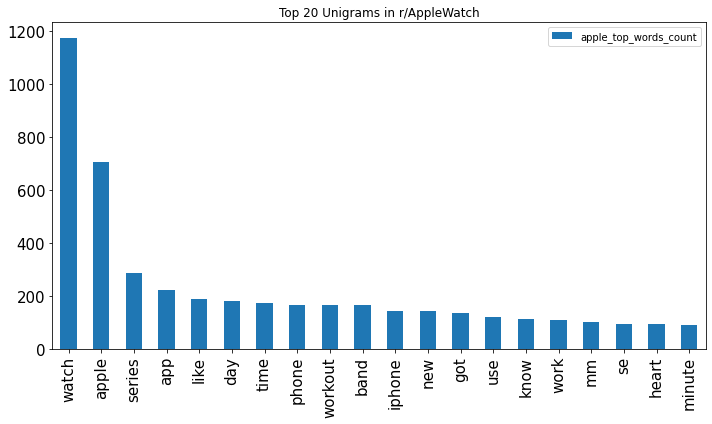

In [331]:
apple_top_words.head(20).plot(kind = 'bar',fontsize = 15, figsize = (10, 6), title = 'Top 20 Unigrams in r/AppleWatch')
plt.savefig('top20apple_unigrams.png')

# # Top 20 GalaxyWatch Unigrams

In [251]:
#Create document-term matrix for galaxywatch corpus also
galaxy_cv = cv.fit_transform(clean_galaxy_text)
galaxy_df = pd.DataFrame(galaxy_cv.toarray(), columns = cv.get_feature_names())
galaxy_df.head()

,aac,ability,able,abroad,absolutely,accelerometer,accept,accesories,access,accessing,accessorize,accessory,accident,according,account,accurate,acquire,act,acting,activate,activated,activates,activating,activation,active,activity,actual,actually,ad,adapter,add,added,adding,addition,additional,address,adhesive,adjust,adjustable,adjusted,adjustment,admit,advance,advanced,advantage,advice,aerobics,af,affect,affected,affecting,afford,affordable,afraid,afresh,africa,aftermarket,agenda,agent,aggregation,ago,ahead,air,airplane,airpod,airtel,alarm,album,alert,alexa,aliexpress,alive,allergy,allow,allowed,allowing,allows,alot,alswas,alternate,alternative,altitude,altogether,aluminium,aluminum,amazing,amazon,ambient,america,american,amoled,amp,amplitude,amusement,analog,analogue,andriod,android,angle,animal,...,weather,website,week,weekend,weekly,weight,weightlifting,weird,welcome,went,wet,wether,wetting,wf,wharf,whatnot,whatsapp,whe,wheeler,whichever,whilst,white,wi,wich,wide,widget,width,wierd,wife,wifi,willing,wind,window,winner,wipe,wirdget,wired,wireless,wirelessly,wise,wish,wishful,wishing,withstand,wocci,woke,wonder,wondered,wonderful,wondering,wonky,wont,wooden,woooo,word,work,workaround,workarounds,worked,working,workout,workspace,world,worldpay,worldwide,worn,worried,worry,worse,worth,worthy,wps,wrapping,wrist,write,writing,wrong,xar,xda,xiaomi,xl,xm,xxu,xxx,yall,yeah,year,yell,yellow,yelp,yep,yes,yesterday,yipee,yoga,youtube,yt,zero,zip,zwift
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [252]:
#Filter the top galaxy unigram words with wordcount
galaxy_top_words = galaxy_df.sum(axis=0).sort_values(ascending=False).to_frame(name='galaxy_top_words_count')
galaxy_word_list = galaxy_top_words.index.values.tolist()
galaxy_top_words.head(20)

,galaxy_top_words_count
watch,1150
galaxy,495
phone,288
samsung,246
app,217
active,205
face,159
gw,154
update,149
use,135


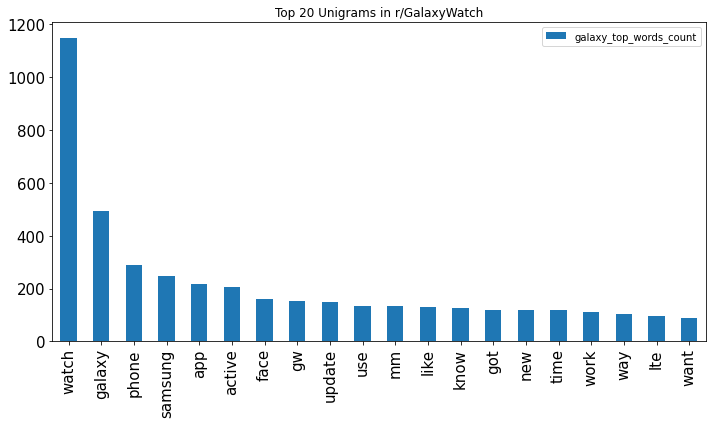

In [333]:
galaxy_top_words.head(20).plot(kind = 'bar',fontsize = 15, figsize = (10, 6), title = 'Top 20 Unigrams in r/GalaxyWatch')

plt.savefig('top20galaxy_unigrams.png')

In [315]:
#Lets also analyse the common_words between two subreddits
common_words = set(apple_word_list) & set(galaxy_word_list)
common_words

{'apartment',
 'delayed',
 'brain',
 'serial',
 'rarely',
 'incorrect',
 'till',
 'needed',
 'team',
 'multiple',
 'kid',
 'match',
 'proved',
 'officially',
 'verizon',
 'gifted',
 'bulk',
 'whilst',
 'pls',
 'company',
 'crappy',
 'checking',
 'apologize',
 'tracker',
 'laptop',
 'performance',
 'alot',
 'accident',
 'ok',
 'ticking',
 'ring',
 'lost',
 'decision',
 'wishing',
 'friend',
 'bank',
 'immediately',
 'hardware',
 'cost',
 'estimate',
 'finger',
 'smallest',
 'brightness',
 'warning',
 'somebody',
 'transferring',
 'switching',
 'album',
 'fundamental',
 'applied',
 'refurbished',
 'repair',
 'torn',
 'second',
 'dropped',
 'climbed',
 'method',
 'perfect',
 'hospital',
 'forgetting',
 'skip',
 'provides',
 'reject',
 'head',
 'trigger',
 'wrong',
 'afraid',
 'shirt',
 'streaming',
 'updated',
 'doubt',
 'understanding',
 'mobile',
 'doesnt',
 'glucose',
 'spotify',
 'really',
 'hear',
 'appointment',
 'shipping',
 'image',
 'holding',
 'philippine',
 'push',
 'processor'

# Wordcloud

To get better visualisation of the top words and common words, lets plot some wordcloud.

In [160]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [318]:
#Get text for wordcloud
apple_text = apple['title_text'].sum()
galaxy_text = galaxy['title_text'].sum()
common_text=df['title_text'].sum()

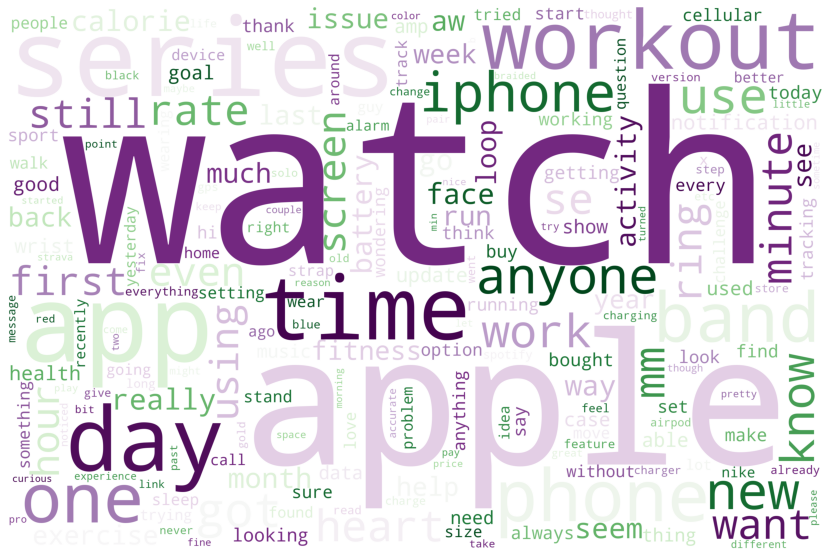

In [324]:
# # Generate word cloud for Applewatch subreddit
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='PRGn', collocations=False, stopwords = STOPWORDS).generate((apple_text))
# Plot
plot_cloud(wordcloud)

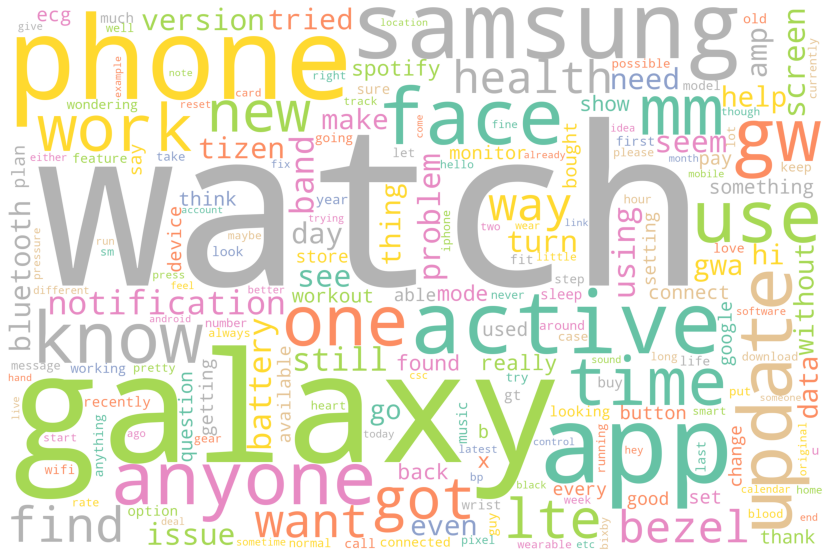

In [325]:
# Generate word cloud for Galaxywatch subreddit
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2_r', collocations=False, stopwords = STOPWORDS).generate((galaxy_text))
# Plot
plot_cloud(wordcloud)


From the top plots we could see that 'watch' is the firts top word that appeared in both r/AppleWatch and r/GalaxyWatch subreddits as expected followed by 'apple' in applewatch subreddit and 'galaxy' in galaxywatch subreddit. 'iphone' and 'samsung' are the next common words that appeared which again is not a surprise. Some of the top common words that appeared in both subreddits are 'phone','app','like','new','mm','time','know','use','work' and 'got'. And 'se' and 'lte' are the models of Applewatch and Galaxywatch respectively which were again the words that might be good classifiers.

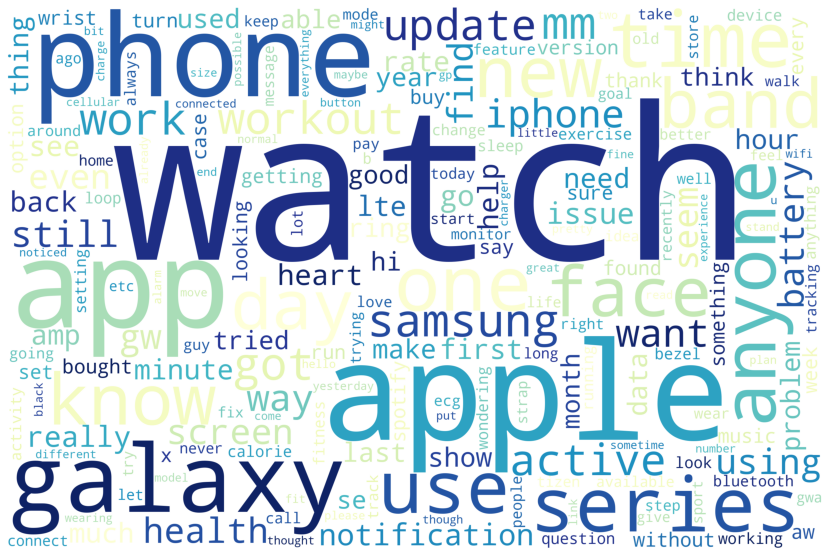

In [340]:
# Generate word cloud for common words
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='YlGnBu_r', collocations=False, stopwords = STOPWORDS).generate((common_text))
# Plot
plot_cloud(wordcloud)

# Top 20 AppleWatch Bigrams

Now that we got understanding of Applewatch and Galaxywatch unigrams, let's dive little bit deeper and analyse the bigrams. Let's initailse a CountVectorizer with 2 ngrams and find the top 20 bigrams in both subreddits.

In [165]:
#Initialize Countvectorizer to find bigrams
cv_bigm = CountVectorizer(ngram_range=(2, 2),stop_words = 'english')
apple_cv1 = cv_bigm.fit_transform(clean_apple_text)

apple_df1 = pd.DataFrame(apple_cv1.toarray(), columns = cv_bigm.get_feature_names())
apple_df1.head()

,ability transcribe,ability use,able able,able add,able artist,able buy,able change,able check,able class,able compete,able connect,able cycle,able determine,able dial,able erase,able focus,able frustrated,able function,able glance,able help,able leave,able listen,able log,able make,able maybe,able month,able open,able past,able pay,able people,able phone,able reach,able reliably,able resolve,able se,able set,able shut,able stream,able tap,able tell,able text,able time,able track,able transcribe,able transfer,able unlock,able use,abloh watchface,absolute relative,absolutely damaged,absolutely desire,absolutely devastating,absolutely fine,absolutely great,absolutely love,absolutely loved,absolutely need,absolutely refused,abysmal gb,accelerometer thanks,accept fitvii,accept phone,accept return,accept term,acceptance bluetooth,access apps,access available,access health,access lot,access music,access point,access siri,access want,accessory iphone,accessory mm,accessory orientation,accident near,accident new,accident sustained,accidental force,accidentally logged,accidentally press,accidentally scratching,accidentally shutting,accidentally tap,accidentally told,accompanying app,accomplished month,account atm,account company,account feasibility,account iphone,account like,account paired,account setting,account want,account wi,account work,accountable aw,accountable ring,...,year husband,year loose,year mark,year maybe,year month,year notoriously,year og,year old,year pound,year really,year reliability,year review,year right,year running,year series,year sold,year soon,year start,year started,year straight,year streak,year sure,year switched,year thought,year trying,year upgraded,year waiting,year wanted,year warranty,year watch,year wearing,year week,year wrist,yellow usually,yellowstone wondering,yes apple,yes heart,yes se,yes spoof,yes wearing,yesterday app,yesterday arvo,yesterday battery,yesterday bought,yesterday calorie,yesterday cleaning,yesterday coming,yesterday computer,yesterday day,yesterday evening,yesterday excited,yesterday good,yesterday got,yesterday grocery,yesterday hour,yesterday know,yesterday listen,yesterday love,yesterday loving,yesterday pace,yesterday paired,yesterday particular,yesterday posted,yesterday really,yesterday registered,yesterday return,yesterday scratched,yesterday sold,yesterday sync,yesterday th,yesterday time,yesterday watch,yesterday wear,yesterday wearing,yesterday wife,yesterday workout,yikes watch,yo dad,yo male,yoga sauna,yoga track,yoga workout,york reading,young highschooler,youtube music,youtube suggests,youtube video,zeppelin working,zero est,zip archive,zone aerobic,zone app,zone cardio,zone closing,zone heart,zone sunset,zone switched,zone useful,zone workout,zwift trainerroad
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0

In [166]:
apple_top_words1 = apple_df1.sum(axis=0).sort_values(ascending=False).to_frame(name='apple_top_words_count')
apple_word_list1 = apple_top_words1.index.values.tolist()
apple_top_words1.head(20)

,apple_top_words_count
apple watch,517
heart rate,84
watch series,65
watch face,51
watch se,41
solo loop,27
battery life,23
health app,19
braided solo,19
watch iphone,19


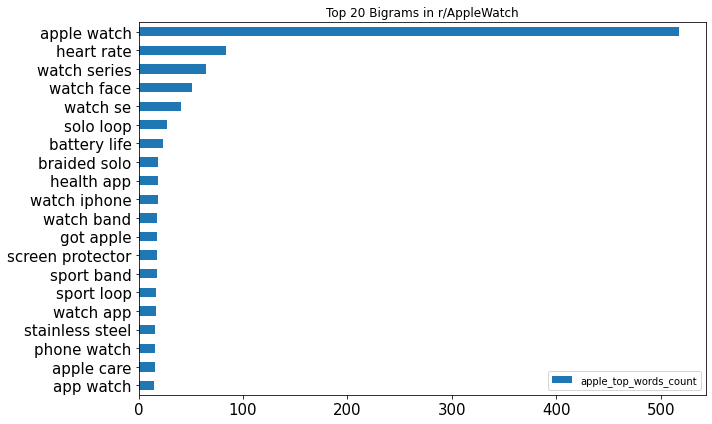

In [338]:
apple_top_words1.head(20).sort_values(by = 'apple_top_words_count',ascending =True).plot(kind = 'barh',fontsize = 15, figsize = (10, 6), title = 'Top 20 Bigrams in r/AppleWatch')

Apart from 'apple watch', the posts are generally about 'heart rate','watch series','screen protector','battery life', etc. They also talk about 'watch app', 'watch face' and models.

# Top 20 GalaxyWatch Bigrams

In [168]:
galaxy_cv1 = cv_bigm.fit_transform(clean_galaxy_text)
galaxy_df1 = pd.DataFrame(galaxy_cv1.toarray(), columns = cv_bigm.get_feature_names())
galaxy_df1.head()

,aac sbc,ability control,ability count,ability cue,ability open,ability skip,ability sync,able add,able answer,able change,able check,able connect,able control,able download,able easily,able ecg,able explain,able galaxy,able getva,able ive,able log,able look,able make,able measure,able picture,able place,able pretty,able remedy,able run,able technical,able touch,able try,able uninstall,able use,able want,able wear,abroad probably,absolutely love,absolutely sold,accelerometer galaxy,accelerometer gps,accept download,accept screw,accesories gwa,access data,access raw,access text,access tizen,access update,access watch,accessing watch,accessorize customize,accessory collection,accessory device,accessory gw,accessory make,accident night,according event,according ice,according twitter,account galaxy,account know,account like,account login,account new,account pay,account phone,account plan,account required,account stream,account switch,account use,account want,account watch,account work,accurate bother,accurate good,accurate information,accurate past,accurate result,acquire galaxy,act afford,act intermediary,act nfc,acting problem,activate esim,activate instruction,activate samsung,activate similar,activate use,activated automatic,activated carrier,activated ecg,activated manual,activated wifi,activates dnd,activates reply,activates say,activating say,activating watch,...,wrong group,wrong left,wrong new,wrong original,wrong place,wrong sleeve,wrong sub,wrong uninstalled,wrong wear,wrong worldpay,xar goal,xar watch,xda app,xda developer,xda evidence,xda forum,xda link,xiaomi mi,xiaomi miband,xiaomi phone,xiaomi reinstall,xiaomi smart,xiaomi user,xl ecg,xl issue,xl matter,xl situation,xm idea,xxu believe,xxu btk,xxu dsl,xxu ftd,xxu fub,xxx ip,xxx replace,xxx xxx,yall think,yeah aw,year ago,year apple,year banged,year better,year bought,year completely,year ditch,year dog,year gb,year got,year great,year including,year issue,year know,year later,year let,year letting,year little,year mean,year old,year realized,year settled,year step,year usage,year watch,year work,yell cloud,yellow gold,yellow tinted,yelp place,yep major,yes right,yesterday changed,yesterday charged,yesterday decided,yesterday downgraded,yesterday evening,yesterday im,yesterday latest,yesterday purchased,yesterday student,yesterday test,yesterday time,yesterday today,yesterday trying,yesterday used,yesterday wondering,yipee couple,yoga second,yoga workout,youtube dont,youtube music,youtube phone,youtube vanced,youtube watch,yt music,zero displayed,zero hour,zip folder,zwift bluetooth,zwift hello,zwift hope
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [320]:
galaxy_top_words1 = galaxy_df1.sum(axis=0).sort_values(ascending=False).to_frame(name='galaxy_top_words_count')
galaxy_word_list1 = galaxy_top_words1.index.values.tolist()
galaxy_top_words1.head(20)

,galaxy_top_words_count
galaxy watch,369
watch face,108
watch active,68
samsung health,55
samsung galaxy,39
watch mm,32
health monitor,30
galaxy active,30
samsung pay,29
phone watch,28


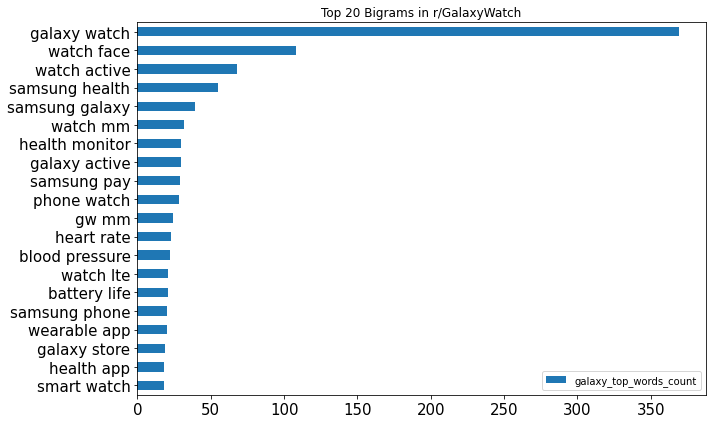

In [339]:
galaxy_top_words1.head(20).sort_values(by = 'galaxy_top_words_count',ascending =True).plot(kind = 'barh',fontsize = 15, figsize = (10, 6), title = 'Top 20 Bigrams in r/GalaxyWatch')

Similarly for r/GalaxyWatch people share about 'watch active','samsung heath', 'samsung pay' and '[wearable app](https://play.google.com/store/apps/details?id=com.samsung.android.app.watchmanager&hl=en_SG&gl=US)' which is recent addition in galaxywatch. Both subreddits often discuss about 'watch face' a lot, '[ Apple watch face](https://support.apple.com/en-sg/guide/watch/apde9218b440/watchos) '[Galaxy watch face](https://www.mygalaxywatch.com/) which seems to be pretty interesting.